#### Imports
Initially, we need to import standard libraries, such as pandas and numpy

In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

dataset = pd.read_excel("./dataset.xlsx")

dataset.head()

,Numbers adv,Health advantage,Average Weapon Cost,Time Pressure,Ults in use,Ults available,Result
0,0,-128,680.0,-51,0,-1,0
1,0,-50,-1400.0,-6,-1,2,0
2,4,364,1470.0,67,0,0,1
3,2,302,-1300.0,27,0,0,1
4,1,325,2622.5,21,0,1,1


#### Fitting the model
Here we will split the data into training and testing sets, and then fit the model

In [16]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

max_of_each_column = np.abs(X).max(axis = 0, keepdims = True)

# Making all the data between -1 and 1 in order to get more accurate weights
normalized_X = X / max_of_each_column

X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, Y, test_size = 10, shuffle = False)

# Fitting the model with the training data
model = LogisticRegression(max_iter = 1000).fit(X_train, Y_train)

model.coef_.astype("float32")

[[ 0.         -0.21333333  0.23129252 -0.6         0.         -0.33333333]
 [ 0.         -0.08333333 -0.47619048 -0.07058824 -1.          0.66666667]
 [ 1.          0.60666667  0.5         0.78823529  0.          0.        ]
 [ 0.5         0.50333333 -0.44217687  0.31764706  0.          0.        ]
 [ 0.25        0.54166667  0.8920068   0.24705882  0.          0.33333333]
 [ 0.          0.05        0.74404762  0.42352941  0.          0.        ]
 [ 0.5         0.54166667 -0.08163265  0.15294118  1.          0.        ]
 [ 1.          1.          0.12244898  0.29411765  1.          0.33333333]
 [ 0.          0.20833333  1.          0.08235294 -1.         -0.33333333]
 [ 0.25        0.33333333  0.4914966   0.22352941 -1.         -0.33333333]
 [ 0.          0.04166667  0.15306122  0.24705882  0.          0.33333333]
 [-0.5        -0.375       0.33673469  0.38823529  0.          0.        ]
 [ 0.25        0.14166667 -0.02268707 -0.38823529  0.          0.        ]
 [ 0.25       -0.20166667

array([[ 0.80900526,  1.0962331 ,  0.49813226,  1.31063   ,  0.5071896 ,
        -0.21046495]], dtype=float32)

#### Test
We will test the performance of the model against the test (validation) data.

In [17]:
prediction = model.predict(X_test)
print(prediction)
print(Y_test)

model.score(X_test, Y_test)

[0 0 0 0 0 0 1 1 1 0]
[0 1 0 0 0 0 0 1 1 1]


0.7

#### Visualization
Here we will plot actual results and the predicted results for comparison

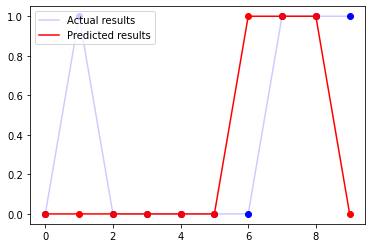

In [18]:
from matplotlib import pyplot as plt

linspace = np.arange(0, 10)
plt.scatter(linspace, Y_test, color = "blue")
plt.plot(linspace, Y_test, color = "blue", label = "Actual results", alpha = 0.2)

plt.scatter(linspace, prediction, color = "red")
plt.plot(linspace, prediction, color = "red", label = "Predicted results")

plt.legend(loc = "upper left")